## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata,study_results, on='Mouse ID', how="outer")
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
total_mice=mouse_metadata['Mouse ID'].count() + study_results['Mouse ID'].count()
print(total_mice)


2142


In [3]:
total_sum=combined_data["Mouse ID"].unique()
len(total_sum)

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
drop_dup_mouse=combined_data.loc[combined_data.duplicated(subset=["Mouse ID","Timepoint"])]
drop_dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID
study_data_mice= combined_data.set_index('Mouse ID')
all_dup_data=study_data_mice.loc["g989",:]
all_dup_data

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [6]:
# # Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data=combined_data[combined_data["Mouse ID"]!="g989"]

clean_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# # Checking the number of mice in the clean DataFrame.
clean_data=clean_study_data["Mouse ID"].unique()
len(clean_data)

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_mean=clean_study_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
mean_reg=pd.Series(regimen_mean.values)

regimen_median=clean_study_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
median_reg=pd.Series(regimen_median.values)

regimen_var=clean_study_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
var_reg=pd.Series(regimen_var.values)

In [9]:
regimen_std=clean_study_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
std_reg=pd.Series(regimen_std.values)


In [10]:
regimen_std=clean_study_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
sem_reg=pd.Series(regimen_std.values)

In [11]:
name=clean_study_data.groupby("Drug Regimen").count()
name
reg_name=pd.Series(name.index[:])

In [12]:
# This method is the most straighforward, creating multiple series and putting them all together at the end.
frame={"Drug Regimen":reg_name,"Mean":mean_reg,"Median":median_reg,"Variance":var_reg,"Std Dev":std_reg,"Sem_reg":sem_reg}
summary_sta=pd.DataFrame(frame)
# summary_sta.set_index('Drug Regimen')
summary_sta

,Drug Regimen,Mean,Median,Variance,Std Dev,Sem_reg
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_study_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

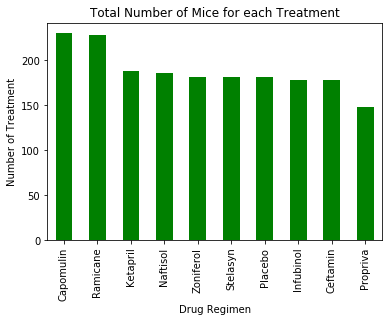

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar_chart=clean_study_data["Drug Regimen"].value_counts()
chart1=bar_chart.plot(kind="bar", title='Total Number of Mice for each Treatment',color='green')
chart1.set_xlabel("Drug Regimen")
chart1.set_ylabel("Number of Treatment")

plt.show()


In [15]:
bar_chart.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148])

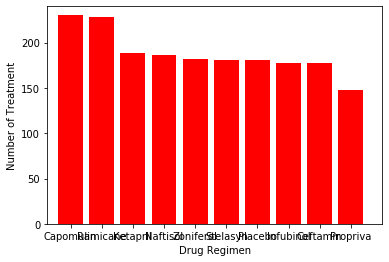

In [16]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_values=bar_chart.index.values
y_values=bar_chart.values
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Treatment")
plt.title='Total Number of Mice for each Treatment'
plt.bar(x_values,y_values,align="center",color="r")
plt.xlim(-.75,10)
plt.ylim(0,max(y_values)+10)
plt.show()

In [17]:
pie_chart=clean_study_data['Sex'].value_counts()
pie_chart
num_male=pie_chart.iloc[0]
num_female=pie_chart.iloc[1]

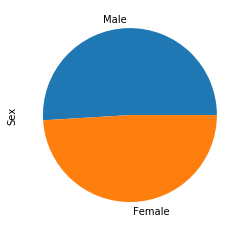

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
num_male=pie_chart.iloc[0]
num_female=pie_chart.iloc[1]
size=[num_male,num_female]
pie_chart.plot(kind="pie")
plt.show()


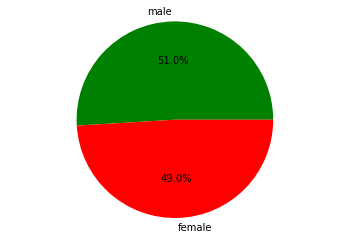

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
size=[num_male,num_female]
my_color=["green","red"]
label=["male","female"]
plt.pie(size,colors=my_color,labels=label,autopct="%1.1f%%")

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
clean_study_data.groupby('Mouse ID').max()
# clean_study_data['Timepoint'].max()
# tumor_volume.loc[["Capomulin"," Ramicane", "Infubinol","Ceftamin"],"Tumor Volume (mm3)"]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0
z578,Ramicane,Male,11,16,45,45.000000,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
clean_study_data.groupby('Mouse ID').max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

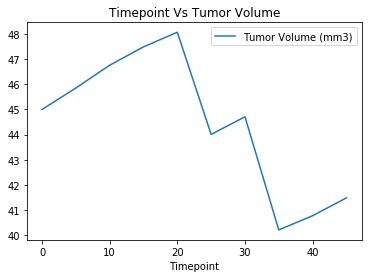

In [27]:
capomulin=clean_study_data.loc[clean_study_data['Drug Regimen']=='Capomulin']
mousedata = capomulin.loc[capomulin['Mouse ID']== 'l509']
mousedata.plot(x="Timepoint",y="Tumor Volume (mm3)",title="Timepoint Vs Tumor Volume")

plt.show()

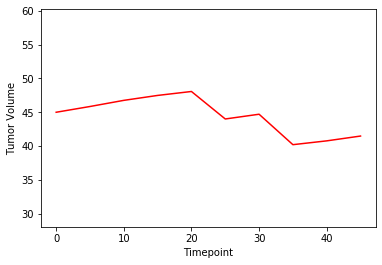

<Figure size 432x288 with 0 Axes>

In [30]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mousedata = capomulin.loc[capomulin['Mouse ID']== 'l509']
x_axis=mousedata["Timepoint"]
x_axis
y_axis=mousedata["Tumor Volume (mm3)"]
y_axis
plt.plot(x_axis,y_axis,color="red")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

plt.axis("equal")


plt.show()
plt.tight_layout()

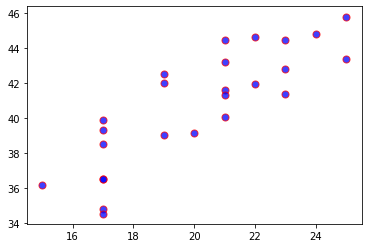

In [58]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin=clean_study_data.loc[clean_study_data['Drug Regimen']=='Capomulin']
capomulin_average = capomulin.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'], marker="o", facecolors="blue",edgecolors="red",alpha=0.75, s=50)
plt.show()

## Correlation and Regression

In [68]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_average = capomulin.groupby(['Mouse ID']).mean()

slope,inter,rvalue,pvalue,stder=stats.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])


NameError: name 'stats' is not defined